In [1]:
# Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize , word_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Downloading nltk Stopwords and Wordnet
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vishw\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset1
Reading 1st datasets 

In [3]:
Dataset1 = pd.read_csv('news.csv')

In [4]:
Dataset1.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [5]:
Dataset1.tail()

Unnamed: 0                                              title  \
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL

In [6]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [7]:
Dataset1['Article'] = Dataset1['title']+Dataset1['text']

In [8]:
#Shuffle 100%
Dataset1.sample(frac=1)

Unnamed: 0                                              title  \
841         6880  WELCOME TO PARIS where tour buses have to navi...   
794         9917  15 Foods That Contain the Most Vitamin E | Alt...   
1900        8470  The Amish In America Commit Their Vote To Dona...   
344          763  The Daily 202: The presidency is Hillary Clint...   
322         6784  Scientists Fascinated By Lake Under The Sea: T...   
...          ...                                                ...   
2300        3645          A standard dejection in the IRS help line   
1036        8082  “Billionaire” Donald Trump’s Presidential Camp...   
4230        4710  Trump’s campaign wants to salvage his ground g...   
3500        1818  Non-confrontational style, social media aiding...   
658        10133  Restaurant Chain Tim Hortons Blocks Independen...   

                                                   text label  \
841   BNI Store Oct 31 2016 WELCOME TO PARIS where t...  FAKE   
794   (Before It's News)\nWhat is Vitamin E? Vitamin...  FAKE   
1900  18 SHARE The Amish in America have committed t...  FAKE   
344   The elites in Washington almost uniformly beli...  REAL   
322   This underwater lake is actually helping scien...  FAKE   
...                                                 ...   ...   
2300  By midmorning, the line of taxpayers outside t...  REAL   
1036  The Washington Post reported : \nDonald Trump ...  FAKE   
4230  Less than a month from Election Day, Donald Tr...  REAL   
3500  When Thomas Bouwsma’s wife Patty was pregnant ...  REAL   
658   By Dan Dicks Tim Hortons Doesn’t Want You To S...  FAKE   

                                                Article  
841   WELCOME TO PARIS where tour buses have to navi...  
794   15 Foods That Contain the Most Vitamin E | Alt...  
1900  The Amish In America Commit Their Vote To Dona...  
344   The Daily 202: The presidency is Hillary Clint...  
322   Scientists Fascinated By Lake Under The Sea: T...  
...                                                 ...  
2300  A standard dejection in the IRS help lineBy mi...  
1036  “Billionaire” Donald Trump’s Presidential Camp...  
4230  Trump’s campaign wants to salvage his ground g...  
3500  Non-confrontational style, social media aiding...  
658   Restaurant Chain Tim Hortons Blocks Independen...  

[6335 rows x 5 columns]

In [9]:
Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

C:\Users\vishw\AppData\Local\Temp/ipykernel_14028/818584941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
C:\Users\vishw\AppData\Local\Temp/ipykernel_14028/818584941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0


In [10]:
Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

In [11]:
Dataset1

Article label
0     You Can Smell Hillary’s FearDaniel Greenfield,...     0
1     Watch The Exact Moment Paul Ryan Committed Pol...     0
2     Kerry to go to Paris in gesture of sympathyU.S...     1
3     Bernie supporters on Twitter erupt in anger ag...     0
4     The Battle of New York: Why This Primary Matte...     1
...                                                 ...   ...
6330  State Department says it can't find emails fro...     1
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...     0
6332  Anti-Trump Protesters Are Tools of the Oligarc...     0
6333  In Ethiopia, Obama seeks progress on peace, se...     1
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...     1

[6335 rows x 2 columns]

In this step we will clean the data that will be used for training. The cleaning will involve these steps- 1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more. 2.Remove all the numeric text, urls

In [12]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [13]:
# Applying the wordpre method to the dataset
Dataset1['Article'] = Dataset1['Article'].apply(wordpre)

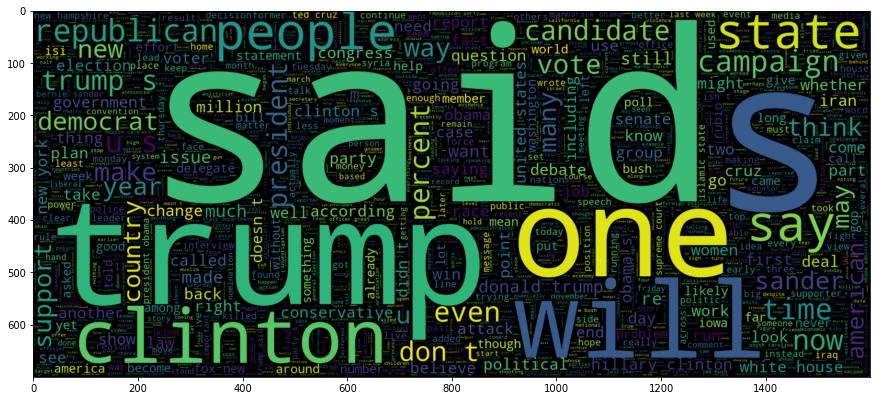

In [14]:
# word used in real news
plt.figure(figsize = (15,15))
wc=WordCloud(max_words = 2000, width=1600, height=700,stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label == 1].Article))
plt.imshow(wc,interpolation='bilinear')

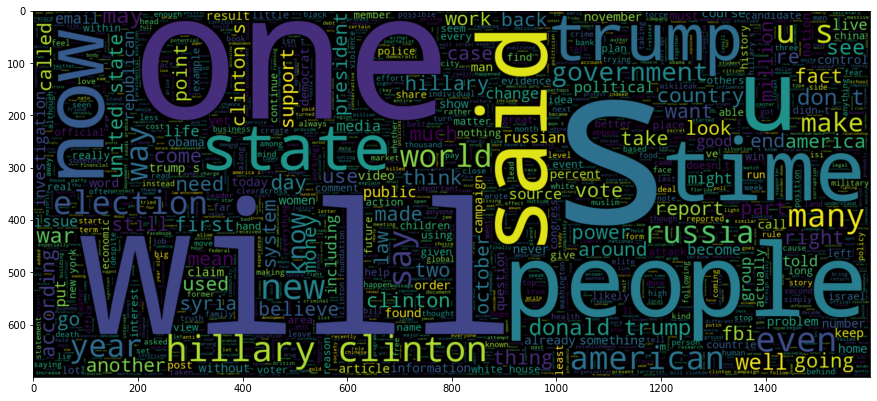

In [15]:
# word used in fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset2

In [16]:
Dataset2_true = pd.read_csv('True.csv')
Dataset2_fake = pd.read_csv('Fake.csv')

In [17]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [18]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [19]:
Dataset2_true.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [20]:
# counting by subject in real news
for key,count in Dataset2_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
# Getting total rwos
print(f"total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
total Records:	21417


In [21]:
Dataset2_fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [22]:
# Counting by subjects in fake news
for key,count in Dataset2_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
# Getting total rows 
print(f"total records:\t{Dataset2_fake.shape[0]}")
    

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
total records:	23481


C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


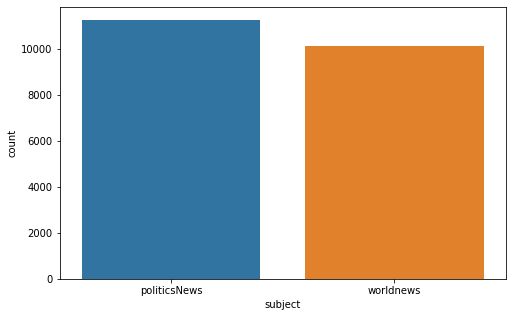

In [23]:
# Ploting the subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_true)
plt.show()

C:\Users\vishw\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


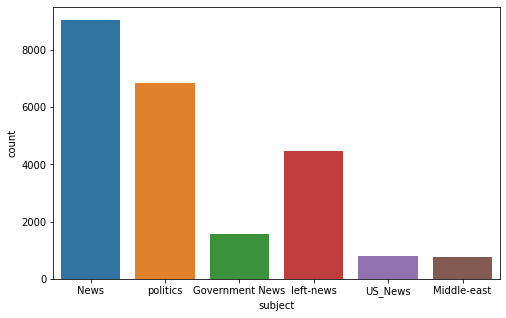

In [24]:
# ploting the subject in fake news
plt.figure(figsize=(8,5))
sns.countplot('subject', data=Dataset2_fake)
plt.show()

In [25]:
Dataset2_true['label'] = 1
Dataset2_fake['label'] = 0

In [26]:
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])

In [27]:
Dataset2.shape

(44898, 5)

In [28]:
Dataset2['Article'] = Dataset2['title'] + Dataset2['text']

In [29]:
Dataset2.sample(frac = 1)

title  \
1845    Alec Baldwin Just Put Trump’s Idiot Supporter...   
6618    House Republicans Just Went After Your Retire...   
14959  BOOM! Ben Carson Eviscerates Rabid Media Over ...   
3107    Special counsel to meet Senate committee leaders   
20398  BOOM! Dodgers Baseball Radio Legend Drops A Mi...   
...                                                  ...   
19266  WATCH! Clueless Anti-Trump “Protesters” Asked ...   
9356   GOP EVIDENCE: Comey FBI Busted Giving Clinton ...   
15175  BREAKING: [VIDEO] Controversial Mayor Who Refu...   
13841  Cambodia's Hun Sen calls for closure of rights...   
15374  TWO ILLEGAL ALIENS TO BECOME FIRST APPOINTED C...   

                                                    text       subject  \
1845   Saturday Night Live returned with a stellar co...          News   
6618   On Thursday Republicans in Congress voted to o...          News   
14959  Ben Carson s professional but hard hitting app...      politics   
3107    (This June 19 story has been refiled to corre...  politicsNews   
20398  This is totally out of left field! Vin Scully ...     left-news   
...                                                  ...           ...   
19266                                                        left-news   
9356   Friday on Fox News Channel s  Fox & Friends,  ...      politics   
15175  There s always another side that s usually bei...      politics   
13841  PHNOM PENH (Reuters) - Cambodian Prime Ministe...     worldnews   
15374  Is there really any point to go through the wo...      politics   

                     date  label  \
1845        April 9, 2017      0   
6618       April 30, 2016      0   
14959         Nov 7, 2015      0   
3107       June 19, 2017       1   
20398        Jun 19, 2016      0   
...                   ...    ...   
19266        Jan 22, 2017      0   
9356         Nov 25, 2017      0   
15175        Sep 24, 2015      0   
13841  November 26, 2017       1   
15374         Aug 3, 2015      0   

                                                 Article  
1845    Alec Baldwin Just Put Trump’s Idiot Supporter...  
6618    House Republicans Just Went After Your Retire...  
14959  BOOM! Ben Carson Eviscerates Rabid Media Over ...  
3107   Special counsel to meet Senate committee leade...  
20398  BOOM! Dodgers Baseball Radio Legend Drops A Mi...  
...                                                  ...  
19266  WATCH! Clueless Anti-Trump “Protesters” Asked ...  
9356   GOP EVIDENCE: Comey FBI Busted Giving Clinton ...  
15175  BREAKING: [VIDEO] Controversial Mayor Who Refu...  
13841  Cambodia's Hun Sen calls for closure of rights...  
15374  TWO ILLEGAL ALIENS TO BECOME FIRST APPOINTED C...  

[44898 rows x 6 columns]

In [30]:
Dataset2 = Dataset2.loc[:,['Article','label']]

In [31]:
Dataset2

Article  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[44898 rows x 2 columns]

In [32]:
# Applying the wordpre method to the dataset
Dataset2['Article'] = Dataset2['Article'].apply(wordpre)

In [33]:
Dataset2.head()

Article  label
0  as u s  budget fight looms  republicans flip t...      1
1  u s  military to accept transgender recruits o...      1
2  senior u s  republican senator   let mr  muell...      1
3  fbi russia probe helped by australian diplomat...      1
4  trump wants postal service to charge  much mor...      1

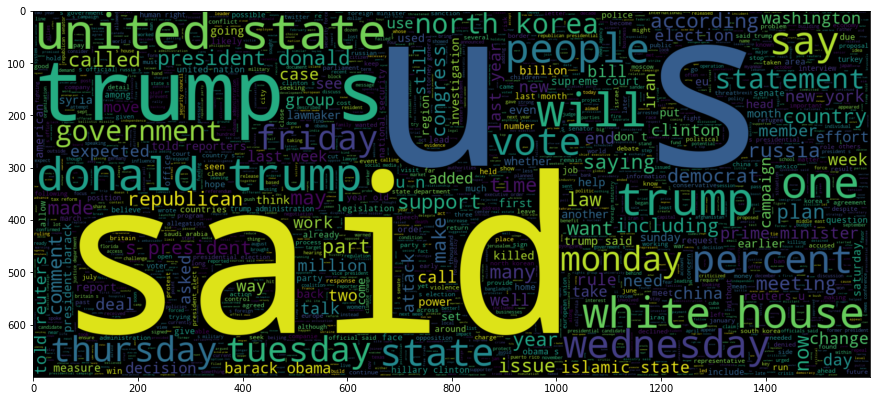

In [34]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

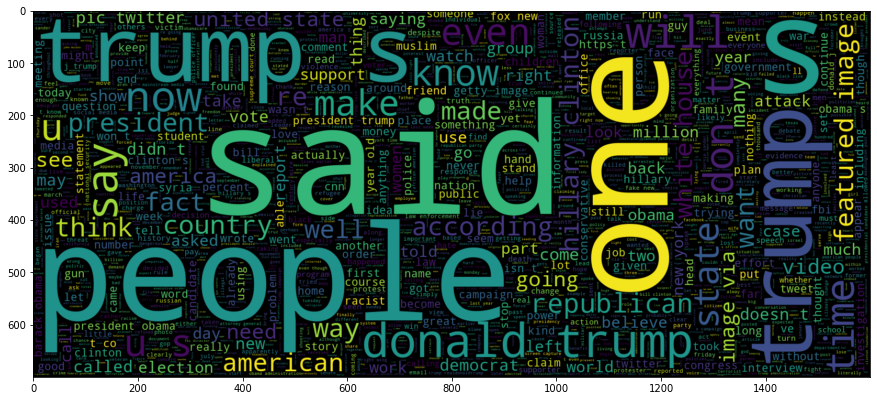

In [35]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 3

In [36]:
Dataset3_real = pd.read_csv('politifact_real.csv')
Dataset3_fake = pd.read_csv('politifact_fake.csv')

In [37]:
Dataset3_real['label']= 1
Dataset3_fake['label']= 0
Dataset3 = pd.concat([Dataset3_real, Dataset3_fake])
Dataset3["Article"] = Dataset3["title"]
Dataset3.sample(frac = 1) #Shuffle 100%
Dataset3 = Dataset3.loc[:,['Article','label']]

In [38]:
Dataset3

Article  label
0          National Federation of Independent Business      1
1                          comments in Fayetteville NC      1
2    Romney makes pitch, hoping to close deal : Ele...      1
3    Democratic Leaders Say House Democrats Are Uni...      1
4      Budget of the United States Government, FY 2008      1
..                                                 ...    ...
427        Who is affected by the government shutdown?      0
428  Lindsey Graham Threatens To Convert To Democra...      0
429  ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...      0
430  Sarah Palin Calls To Boycott Mall Of America B...      0
431                                  Account Suspended      0

[1056 rows x 2 columns]

In [39]:
# Applying the wordpre method to the dataset
Dataset3['Article'] = Dataset3['Article'].apply(wordpre)

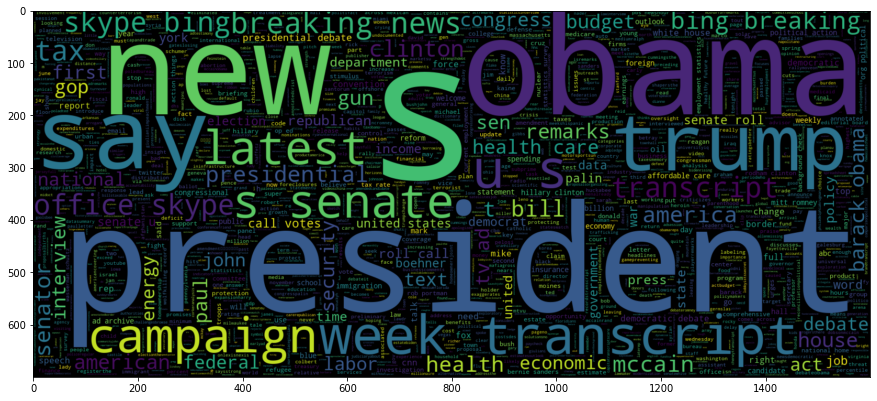

In [40]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

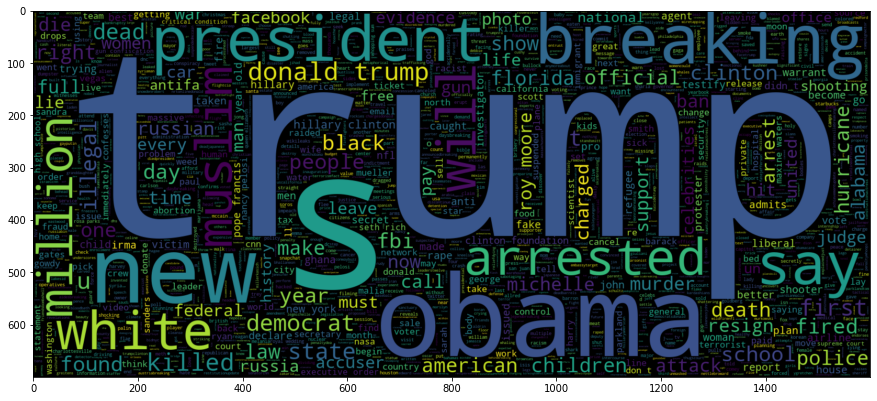

In [41]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 4

In [42]:
Dataset4 = pd.read_csv('train.csv')

In [43]:
Dataset4.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [44]:
Dataset4['Article'] = Dataset4['title'] + Dataset4['text']
Dataset4.sample(frac = 1)
Dataset4 = Dataset4.loc[:,['Article','label']]
Dataset4 = Dataset4.dropna()

In [45]:
##  Applying the wordpre method to the dataset
Dataset4['Article']=Dataset4['Article'].apply(wordpre)

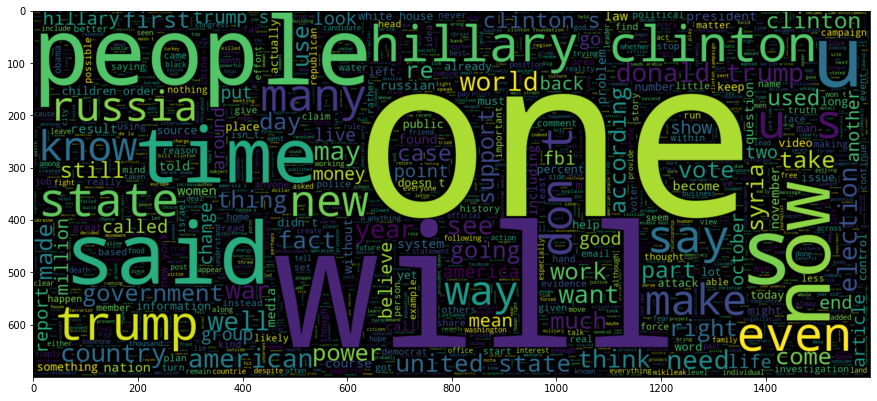

In [46]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

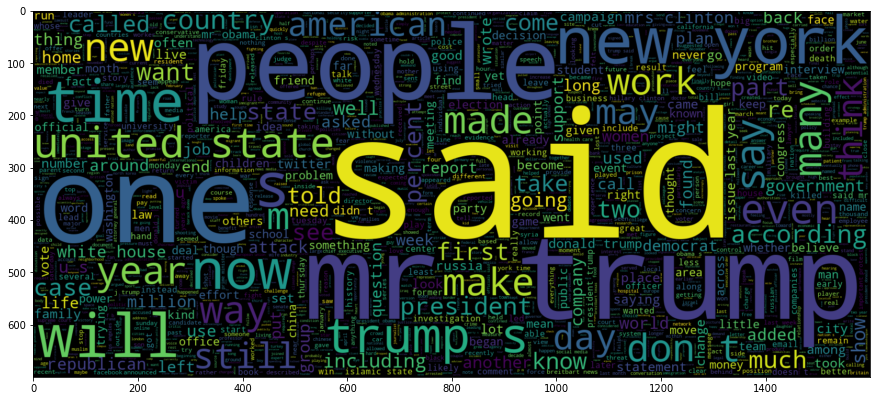

In [47]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

  # Dataset 5

In [48]:
Dataset5 = pd.read_csv('data.csv')

In [49]:
Dataset5.head()

URLs  \
0  http://www.bbc.com/news/world-us-canada-414191...   
1  https://www.reuters.com/article/us-filmfestiva...   
2  https://www.nytimes.com/2017/10/09/us/politics...   
3  https://www.reuters.com/article/us-mexico-oil-...   
4  http://www.cnn.com/videos/cnnmoney/2017/10/08/...   

                                            Headline  \
0         Four ways Bob Corker skewered Donald Trump   
1  Linklater's war veteran comedy speaks to moder...   
2  Trump’s Fight With Corker Jeopardizes His Legi...   
3  Egypt's Cheiron wins tie-up with Pemex for Mex...   
4        Jason Aldean opens 'SNL' with Vegas tribute   

                                                Body  Label  
0  Image copyright Getty Images\nOn Sunday mornin...      1  
1  LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2  The feud broke into public view last week when...      1  
3  MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4  Country singer Jason Aldean, who was performin...      1

In [50]:
Dataset5["Article"] = Dataset5["Headline"] + Dataset5["Body"]
Dataset5["label"] = Dataset5["Label"]
Dataset5.sample(frac = 1) #Shuffle 100%
Dataset5 = Dataset5.loc[:,['Article','label']]
Dataset5 = Dataset5.dropna()

In [51]:
##  Applying the wordpre method to the dataset
Dataset5['Article']=Dataset5['Article'].apply(wordpre)

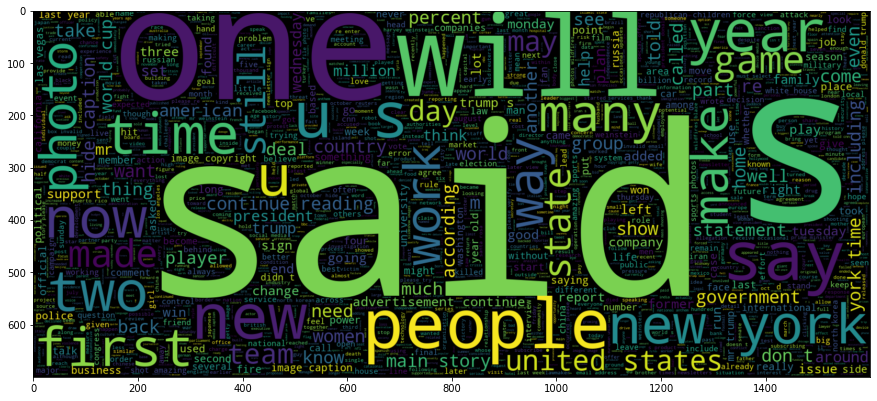

In [52]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

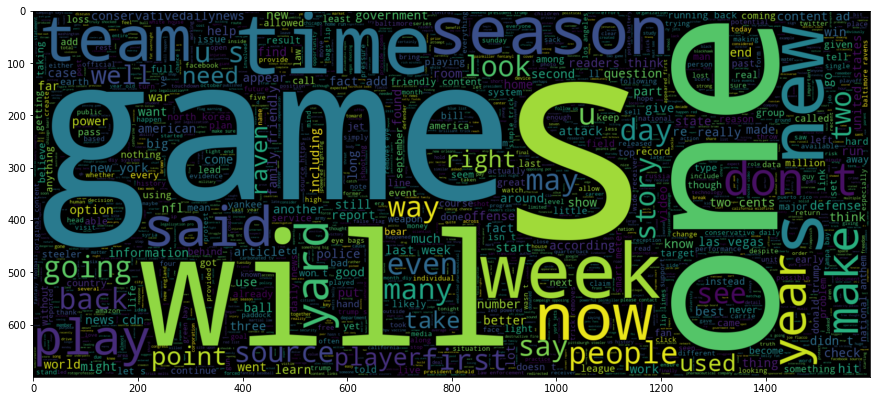

In [53]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

### Combining all the dataset into one

In [54]:
frames = [Dataset1,Dataset2,Dataset3,Dataset4,Dataset5]
Dataset = pd.concat(frames)

In [55]:
Dataset.shape

(76480, 2)

In [56]:
x_train,x_test,y_train,y_test = train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=2020)

In [57]:
x_train.shape

(61184,)

In [58]:
x_train.head()

12743    serbian president says serbia does not plan to...
1797      this guy predicted trump s win  and what he h...
4984      donald trump gets mercilessly mocked for call...
19786    wow  hillary took state department furniture t...
20418    not news   dead  wounded in obama s hometown i...
Name: Article, dtype: object

In [59]:
x_test.shape

(15296,)

In [60]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')

### LogisticRegression

In [61]:
pipe = Pipeline([('vect',CountVectorizer()),
                ('tfidf',TfidfTransformer()),
                ('model',LogisticRegression())])
Logisticmodel = pipe.fit(x_train,y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test,prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test,prediction)*100,2)

accuracy: 87.05%


### DecisionTreeClassifier

In [62]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.07%


### RandomForestClassifier

In [63]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction = RandomForestmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

KeyboardInterrupt: 

### Stochastic Gradient Descent

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])
SGDmodel = pipe.fit(x_train, y_train)
prediction = SGDmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
SDGmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

GBCmodel = pipe.fit(x_train, y_train)
prediction = GBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
GBCmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

### XGBClassifier

In [ ]:
from xgboost import XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

xgboostmodel = pipe.fit(x_train, y_train)
prediction = xgboostmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
xgboostmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

### Multinomial Naive Bayes Classifier

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

MNBCmodel = pipe.fit(x_train, y_train)
prediction = MNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Multinomial_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

### Bernoulli Naive Bayes Classifier

In [ ]:
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

BNBCmodel = pipe.fit(x_train, y_train)
prediction = BNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Bernoulli_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

In [ ]:
x = ["SDGmodel_accuracy", "Logisticmodel_accuracy", "GBCmodel_accuracy", "xgboostmodel_accuracy" , 
     "DecisionTreemodel_accuracy","RandomForestmodel_accuracy","Multinomial_Naive_Bayes_accuracy",
     "Bernoulli_Naive_Bayes_accuracy"]
y =  [SDGmodel_accuracy,Logisticmodel_accuracy,GBCmodel_accuracy,xgboostmodel_accuracy,
      DecisionTreemodel_accuracy,RandomForestmodel_accuracy,Multinomial_Naive_Bayes_accuracy,
      Bernoulli_Naive_Bayes_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [64]:
import joblib  
# Save the model as a pickle in a file 
joblib.dump(Logisticmodel, 'model.pkl')  

['model.pkl']